# 1. Frame the problem

In [ ]:
av Henrik Olsgaard


Jobbet sammen med: Elisabeth Hovden

In [73]:
korel_matrise["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

fylles ut*****


### Setup

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sklearn


#Visningsinnstillinger for pandas når vi skal se visualisere dataene
#Dersom vi ikke gjør dette vil pandas kun vise deler av dataene (en kompirmert versjon)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 900)

In [33]:
seed = 42
np.random.seed(seed)

### Beskrivelse av features :

-  SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
-  ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale


___________________________________

# 2. Datafetching

I denne denne delen definerer vi en metode for å hente ut dataene. 
Grunnen til av gjør dette som en egen metode, er for å lettere se hva som blir gjort. 
Det er viktig at vi kun bruker train.csv filen og ikke test.csv filen også


___________________________________________________________________

In [48]:
def load_data():
    housing_file_path = 'datasets/train.csv'
    return pd.read_csv(housing_file_path)

Lagrer filen i en variabel

In [49]:
housing_data = load_data()

______________

# 3. Data exploration



Først tar vi en utskrift av metoden .shape() for å finne ut størrelsen på datasettet

In [57]:
print("\nHousing data, data størrelse: {} ".format(housing_data.shape))


Housing data, data størrelse: (1460, 81) 


Vi har altså 1460 hus, med 81 ulike egenskaper(features). 
Dette betyr nødvendigvis ikke at alle hus har alle celler med egenskaper utfylt.
Dette tar vi stilling til senere når vi skal fase ut uviktige egenskaper.

________________________________

- Vi ser videre inn i dataene til train.csv for å se hvordan de ulike egenskapene er fordelt med metoden .info()
- Kolonne 1: navn på features
- Kolonne 2: antall instanser 
- kolonne 3: datatype 
    - int64 og float64 er numeriske verdier
    - object er ulike kategorier innenfor hver enkelt feature

In [41]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

___________________

- Vi sjekker at dataen vi skal se på er riktig formatert i forhold til innstillingene vi satt i starten
- Tallet vi har i parantes angir hvor mange hus vi skal se på. Denne er 5 dersom vi ikke definerer den

In [50]:
housing_data.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


Denne metoden brukes for å genere forklarerende statistikk som blant annet viser sprendningen av dataen innenfor settet.  

In [51]:
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


- count : Antall instanser av hvert feature. 
    - Her er 1460 maks antall, dvs at vi feks mangler data fra noen av husene på LoTFrontage (1201/1460)
- mean: Gjennomsnittet 
    -  Gj.snittlig byggeår er 1971
- std: Normalfordeling
    
- min: Minsteverdi

- 25% / 50% / 75%: Angir grensen for hvor 25% av dataene faller inn under
    -  Under bygningsår ser vi at 25% av husene er bygget før 1954
    -  Denne dataen gir en innsikt i hvor vektingen ligger i dataene. 
    -  Siden bygningsåret øker mindre og mindre jo nærmere 100% vi kommer, sier dette oss hvor flesteparten av dataene ligger. Denne delen er en grei faktor for å luke ut data som ødelegger for majoriteten

- Max: Høyeste verdi

________________________

Her setter vi opp et histogram pr feature, gitt at featuren er numerisk.

-  bins: hvor mange søyler vi skal dele histogrammet opp i
- figsize: hvor mange pikseler hvert bilde skal ha

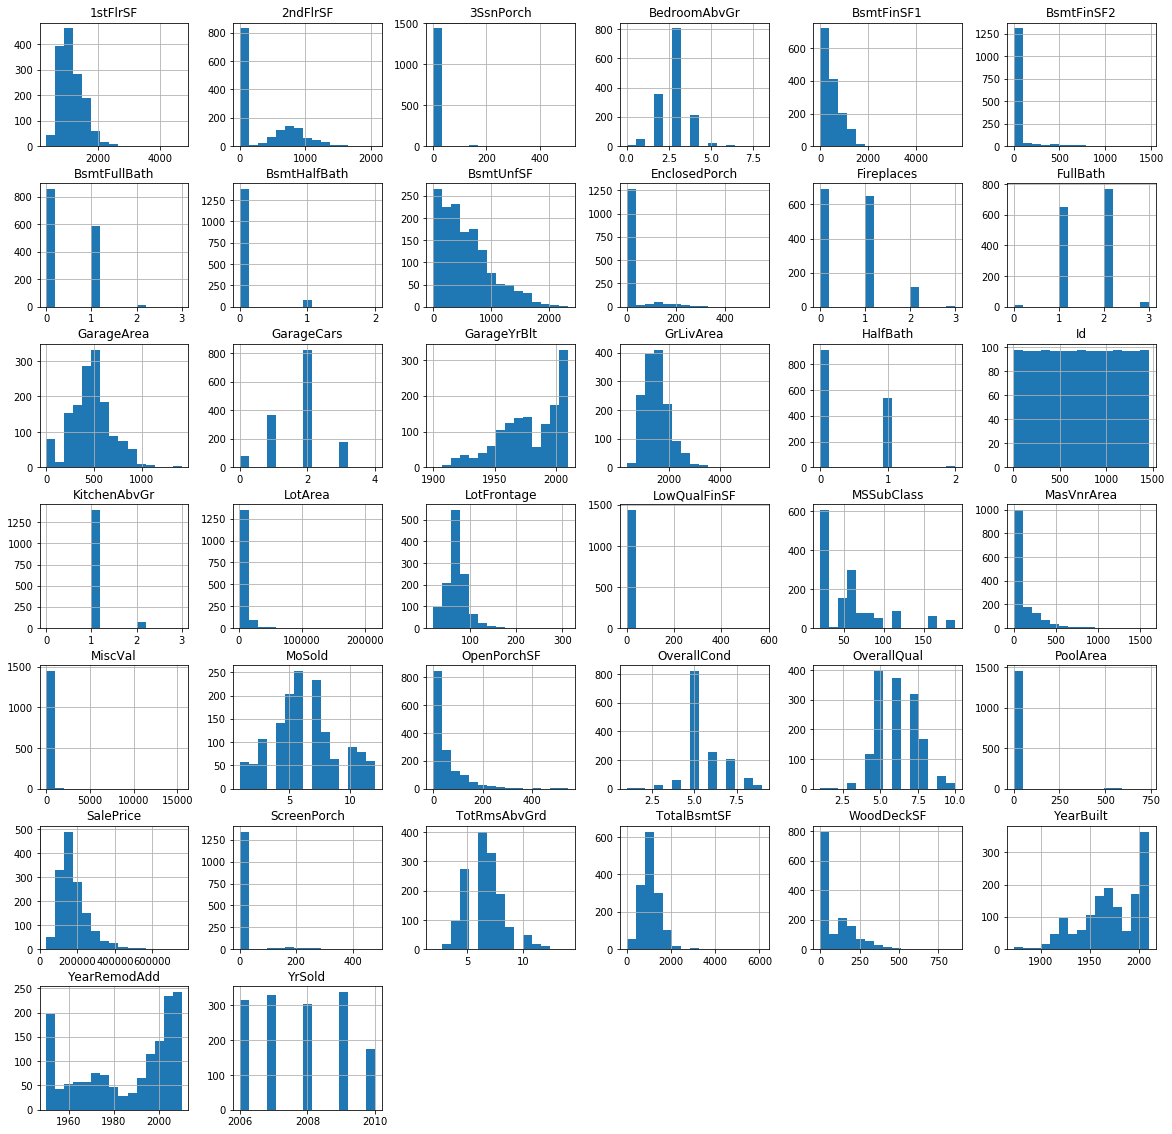

In [59]:
housing_data.hist(bins=15, figsize=(20,20))
plt.show()

In [ ]:
En kort oppsummering av hvilket features et typisk hus har:
-  90kvm dersom det kun én etasje
-  160kvm dersom to etasjer
-  svært få med vinterhage
-  minst 2 til 3 soverom
-  ca. 40% uten grad 1-Kjeller/bod (standard kjeller uten innlagt strøm)
    -  resterende 60% med liten kjeller som gradvis blir mindre fram til ca 180kvm
-  85% uten grad 2-Kjeller/bod (typisk verksted/anlegsrom som krever et tørrere miljø)
    -  resterende jevnt fordelt fram til ca 70kvm
- 60% uten bad i kjeller/bod, av resterende 40% har ca 95% ét bad
- 90% uten et lite bad i kjeller/bod
- <80kvm med uferdig kjeller/bod


Dersom vi vil se mer detaljert på et enkelt histogram skriver vi følgende:


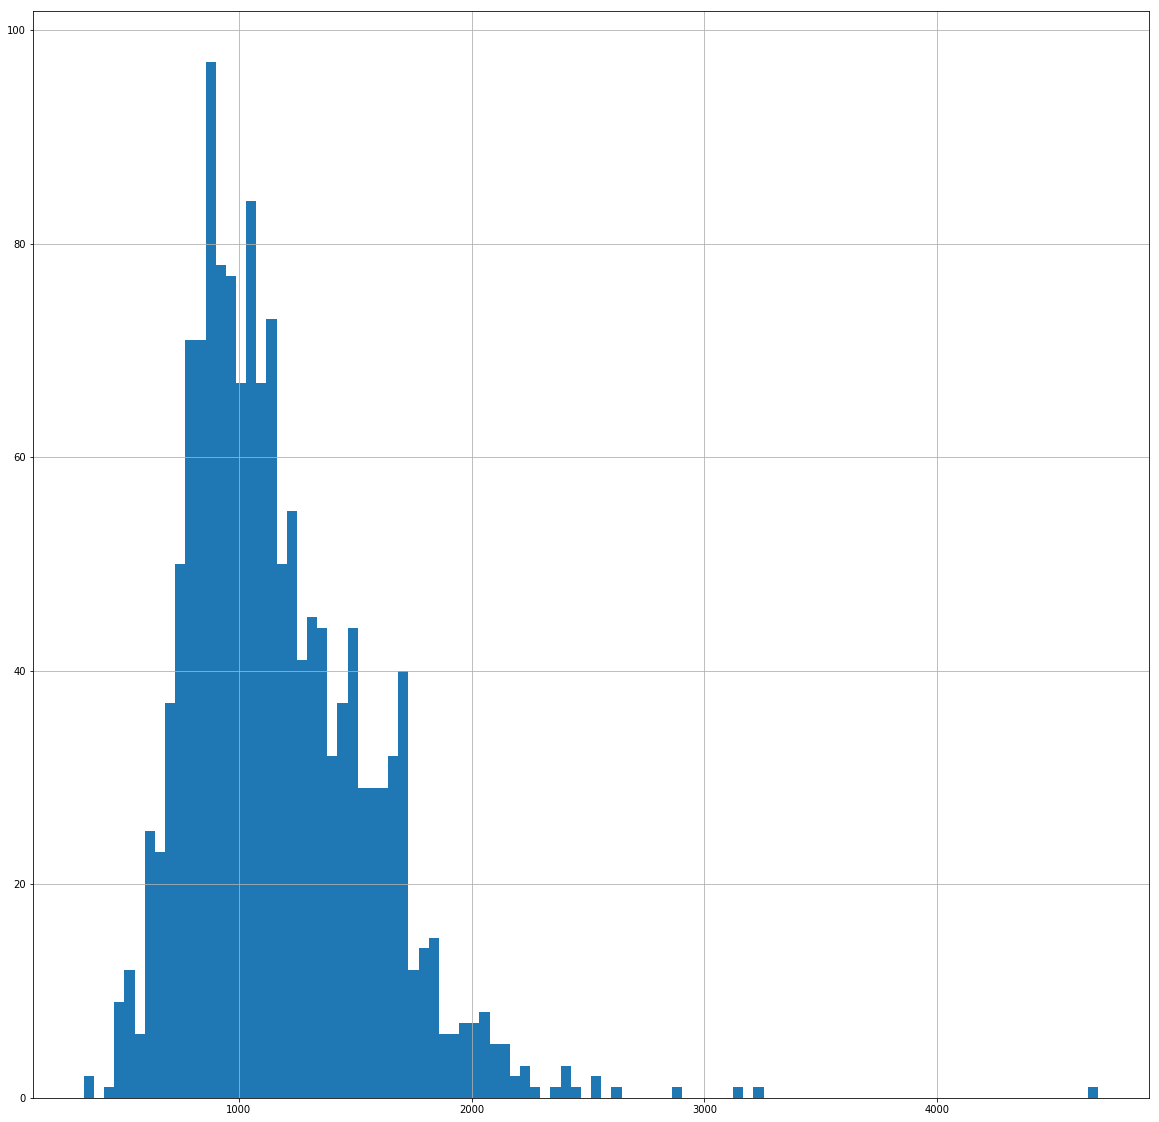

In [69]:
housing_data["1stFlrSF"].hist(bins=100, figsize=(20,20))

Dersom vi ønsker histogrammet enda mer tydelig kan man dobbeltrykke på selve diagrammet

_________________________________

### Korelasjoner

Vi vil se om det er noen sammenheng mellom de ulike dataene. Indeksen går fra -1 til 1. Dersom denne er 0, vil denne egenskapen ikke påvirke den egenskaper vi fokuserer på. Er den 1 er den 100% utslagsgivene. Er den negativ vil verdien synke hvis hovedegenskapen øker. 

Vi starter med å lagre denne i variabelen korel_matrise

In [72]:
korel_matrise = housing_data.corr()

Siden oppgaven vår handler om å forutse boligprisen for det gitte området dataene er hentet fra, vil salgsprisen være den egenskapen vi måler korelasjonen opp mot.
Vi velger å sortere de som sykende verdier (ascending=False), slik at det blir mer oversiktlig

In [73]:
korel_matrise["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

-  Vi ser først at egenskapen "OverallQual" er den som påvirker boligprisen mest, tett etterfulgt av GrLivArea og GarageCars. 
-  KitchenAbvGr er den egenskapen som får boligprisen til minke mest
-  BsmtFinSF2 er den som påvirker boligprisen minst


_______________

Vi velger så ut 3 egenskaper vi vil forstørre:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016B35B3AF98>,
      dtype=object)

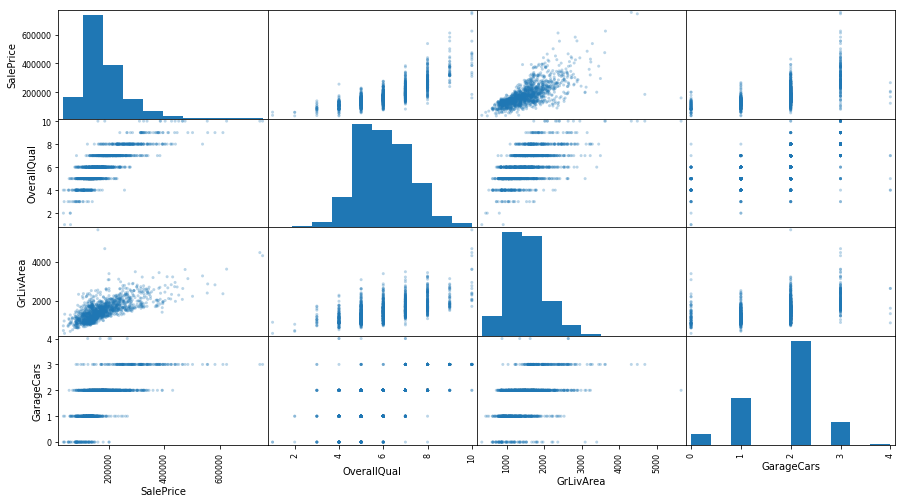

In [75]:
from pandas.plotting import scatter_matrix

attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars"]

scatter_matrix(housing_data[attributes], figsize=(15, 8), alpha=0.3)

-  ant. garasjeplasser gjør boligen dyrere, men ikke nødvendigvis
-  ant. kvm på boligen har en relativt jevn spredning
-  generel kvalitet på boligen ser vi er den som har mest tydelig korelasjon med boligprisen

For å se alt i en helhet er metoden .heatmap() til seaborn grei å bruke. Her vil vi få opp korelasjonen mellom alle egenskapene i et enkelt diagram, hvor fargekoden gjør det lett å visualisere korelasjonsdataene. 


Kilde:  https://seaborn.pydata.org/generated/seaborn.heatmap.html

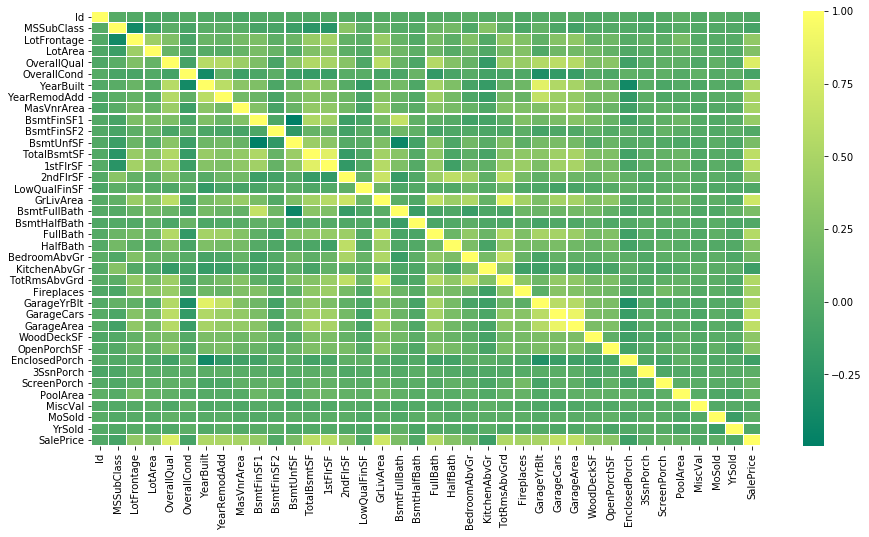

In [86]:
# Checking feature correlations
import seaborn as sns

corr = housing_data.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=False, cmap='summer', linewidths=0.3)
plt.show()

# 4. Prepare the data:

Denne innleveringen er noe ufullstendig, men skal oppdatere den slik at denne blir fullstendig. Har jobbet i felleskap med Elisabeth Hovden på oppgaven som hun har levert. 